In [97]:
import os
import sys
#from stocker import Stocker
import io
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import pandas_datareader as pdr
import matplotlib.dates as mdates
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import datetime
%config IPCompleter.greedy=True
from matplotlib import style
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas.plotting import register_matplotlib_converters
plt.style.use('fivethirtyeight')

In [98]:
pwd


'C:\\Users\\rony1\\Documents\\New folder'

In [99]:
cd C:\Users\rony1\Documents\New folder

C:\Users\rony1\Documents\New folder


In [100]:
Apple_df = pd.read_csv('AAPL.csv')
Amazon_df = pd.read_csv('AMZN.csv')
Google_df = pd.read_csv('GOOG.csv')
Microsoft_df = pd.read_csv('MSFT.csv')
Facebook_df = pd.read_csv('FB.csv')

In [101]:
style.use('classic')

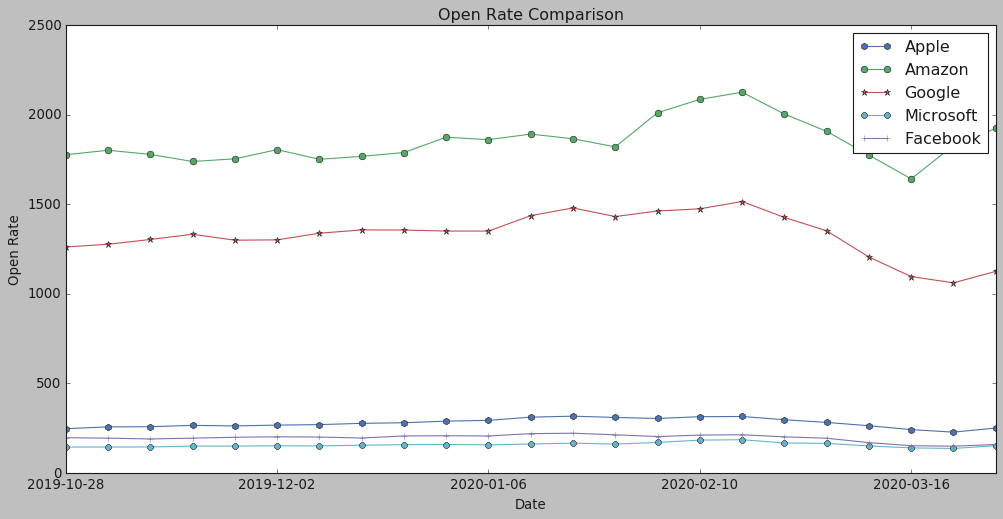

In [102]:
ax = plt.gca()
#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Apple_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='h',label='Apple',x_compat=True)
Amazon_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='o',label='Amazon',x_compat=True)
Google_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='*',label='Google',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='8',label='Microsoft',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='+',label='Facebook',x_compat=True)


plt.title("Open Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Open Rate");

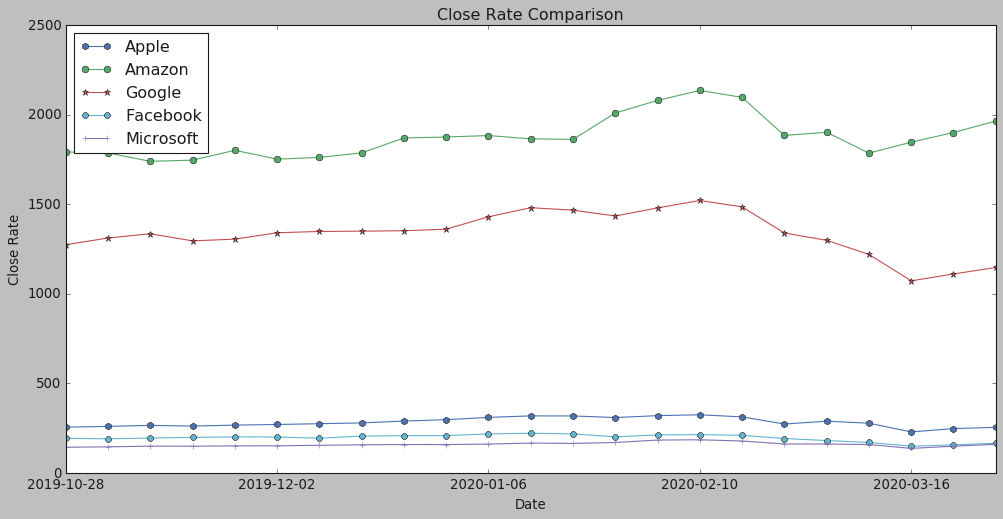

In [103]:
ax = plt.gca()

Apple_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='h',label='Apple',x_compat=True)
Amazon_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='o',label='Amazon',x_compat=True)
Google_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='*',label='Google',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='8',label='Facebook',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='+',label='Microsoft',x_compat=True)


plt.title("Close Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Close Rate");

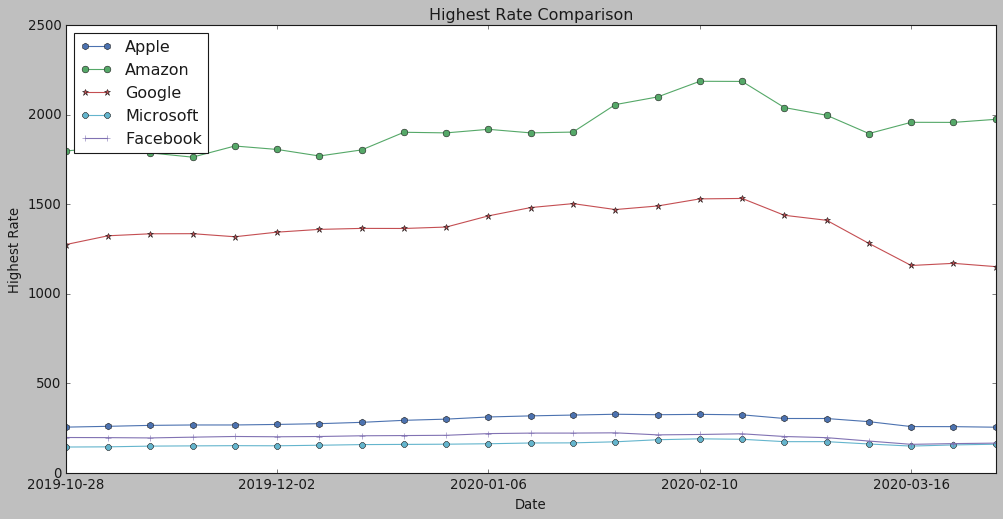

In [104]:
ax = plt.gca()


Apple_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='h',label='Apple',x_compat=True)
Amazon_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='o',label='Amazon',x_compat=True)
Google_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='*',label='Google',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='8',label='Microsoft',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='+',label='Facebook',x_compat=True)


plt.title("Highest Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Highest Rate");

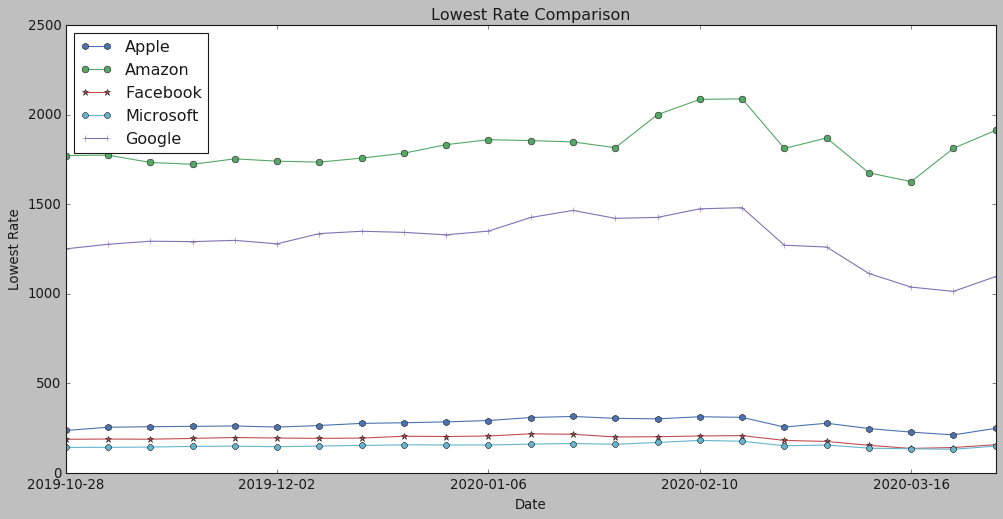

In [105]:
ax = plt.gca()

Apple_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='h',label='Apple',x_compat=True)
Amazon_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='o',label='Amazon',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='*',label='Facebook',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='8',label='Microsoft',x_compat=True)
Google_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='+',label='Google',x_compat=True)


plt.title("Lowest Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Lowest Rate");

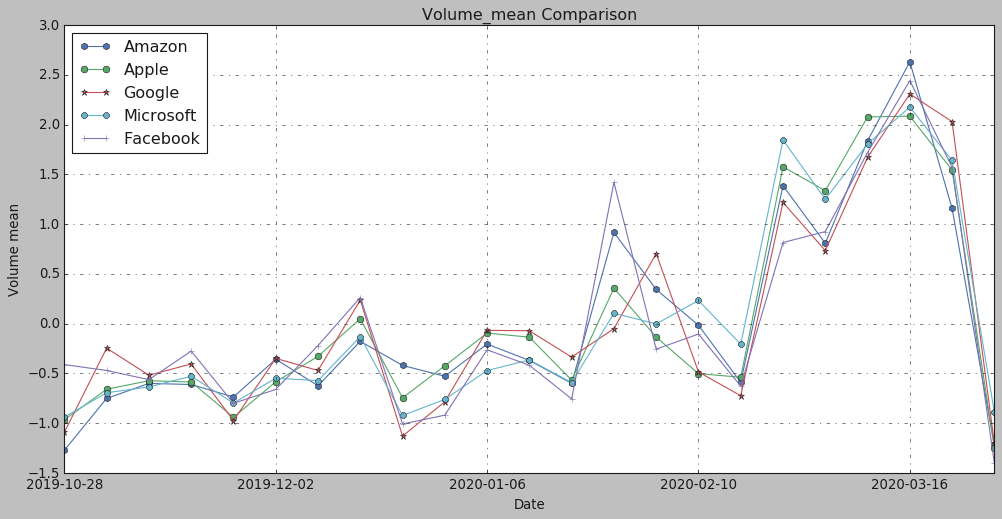

In [106]:
ax = plt.gca()
Amazon_df['Volume_mean']=(Amazon_df['Volume']-Amazon_df['Volume'].mean())/Amazon_df['Volume'].std()
Apple_df['Volume_mean']=(Apple_df['Volume']-Apple_df['Volume'].mean())/Apple_df['Volume'].std()
Google_df['Volume_mean']=(Google_df['Volume']-Google_df['Volume'].mean())/Google_df['Volume'].std()
Microsoft_df['Volume_mean']=(Microsoft_df['Volume']-Microsoft_df['Volume'].mean())/Microsoft_df['Volume'].std()
Facebook_df['Volume_mean']=(Facebook_df['Volume']-Facebook_df['Volume'].mean())/Facebook_df['Volume'].std()
Amazon_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='h',label='Amazon',x_compat=True)
Apple_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='o',label='Apple',x_compat=True)
Google_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='*',label='Google',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='8',label='Microsoft',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='+',label='Facebook',x_compat=True)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
#datacursor(formatter=formatter, hover=True)
plt.title("Volume_mean Comparison")
plt.xlabel("Date")
plt.ylabel("Volume mean");

In [107]:
# Define the minumum of periods to consider 
min_periods = 2

# Calculate the volatility
Apple_volatility=np.log(Apple_df['Adj Close'].pct_change()+1)
Apple_volatility.fillna(0,inplace=True)
Apple_volatility=Apple_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Apple_df['Volatility']=Apple_volatility

Amazon_volatility=np.log(Amazon_df['Adj Close'].pct_change()+1)
Amazon_volatility.fillna(0,inplace=True)
Amazon_volatility=Amazon_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Amazon_df['Volatility']=Amazon_volatility

Google_volatility=np.log(Google_df['Adj Close'].pct_change()+1)
Google_volatility.fillna(0,inplace=True)
Google_volatility=Google_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Google_df['Volatility']=Google_volatility

Microsoft_volatility=np.log(Microsoft_df['Adj Close'].pct_change()+1)
Microsoft_volatility.fillna(0,inplace=True)
Microsoft_volatility=Microsoft_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Microsoft_df['Volatility']=Microsoft_volatility

Facebook_volatility=np.log(Facebook_df['Adj Close'].pct_change()+1)
Facebook_volatility.fillna(0,inplace=True)
Facebook_volatility=Facebook_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Facebook_df['Volatility']=Facebook_volatility


Apple_df['HL_PCT'] = (Apple_df['High'] - Apple_df['Low']) / Apple_df['Close'] * 100.0
Apple_df['PCT_change'] = (Apple_df['Close'] - Apple_df['Open']) / Apple_df['Open'] * 100.0

Amazon_df['HL_PCT'] = (Amazon_df['High'] - Amazon_df['Low']) / Amazon_df['Close'] * 100.0
Amazon_df['PCT_change'] = (Amazon_df['Close'] - Amazon_df['Open']) / Amazon_df['Open'] * 100.0

Google_df['HL_PCT'] = (Google_df['High'] - Google_df['Low']) / Google_df['Close'] * 100.0
Google_df['PCT_change'] = (Google_df['Close'] - Google_df['Open']) / Google_df['Open'] * 100.0

Microsoft_df['HL_PCT'] = (Microsoft_df['High'] - Microsoft_df['Low']) / Microsoft_df['Close'] * 100.0
Microsoft_df['PCT_change'] = (Microsoft_df['Close'] - Microsoft_df['Open']) / Microsoft_df['Open'] * 100.0

Facebook_df['HL_PCT'] = (Facebook_df['High'] - Facebook_df['Low']) / Facebook_df['Close'] * 100.0
Facebook_df['PCT_change'] = (Facebook_df['Close'] - Facebook_df['Open']) / Facebook_df['Open'] * 100.0

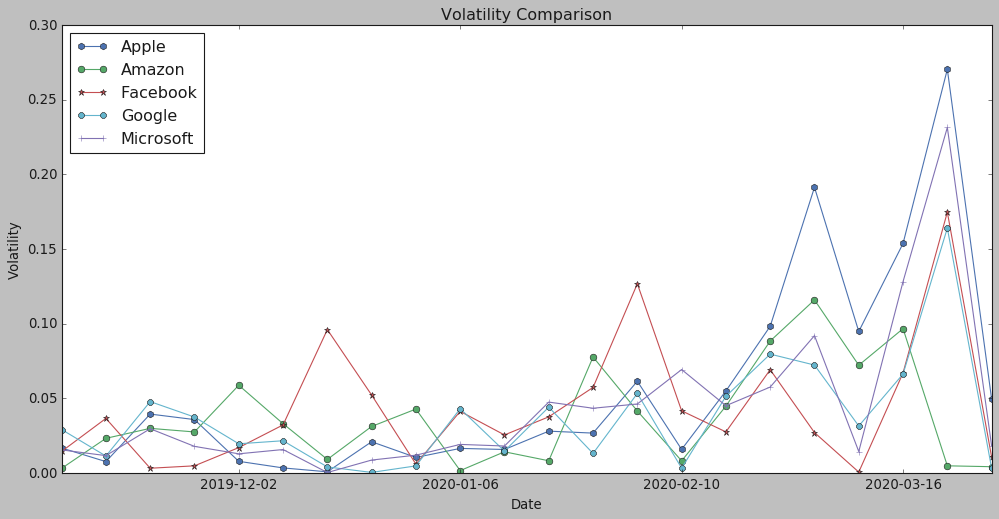

In [108]:
#file.plot(x="Date",y="Volume")
ax = plt.gca()

#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Apple_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='h',label='Apple',x_compat=True)
Amazon_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='o',label='Amazon',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='*',label='Facebook',x_compat=True)
Google_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='8',label='Google',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='+',label='Microsoft',x_compat=True)

#datacursor(formatter=formatter, hover=True)
plt.title("Volatility Comparison")
plt.xlabel("Date")
plt.ylabel("Volatility");

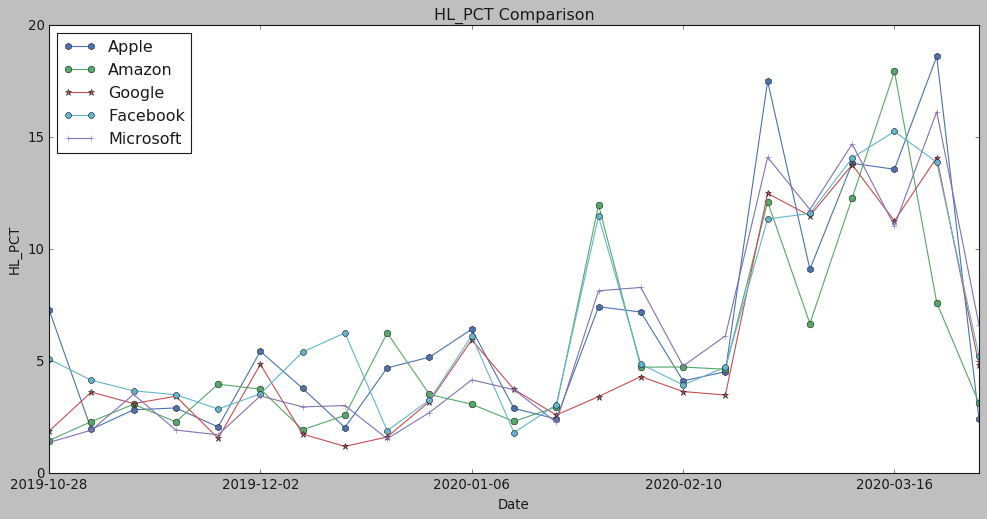

In [109]:
#file.plot(x="Date",y="Volume")
ax = plt.gca()

#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Apple_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='h',label='Apple',x_compat=True)
Amazon_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='o',label='Amazon',x_compat=True)
Google_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='*',label='Google',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='8',label='Facebook',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='+',label='Microsoft',x_compat=True)

#datacursor(formatter=formatter, hover=True)
plt.title("HL_PCT Comparison")
plt.xlabel("Date")
plt.ylabel("HL_PCT");

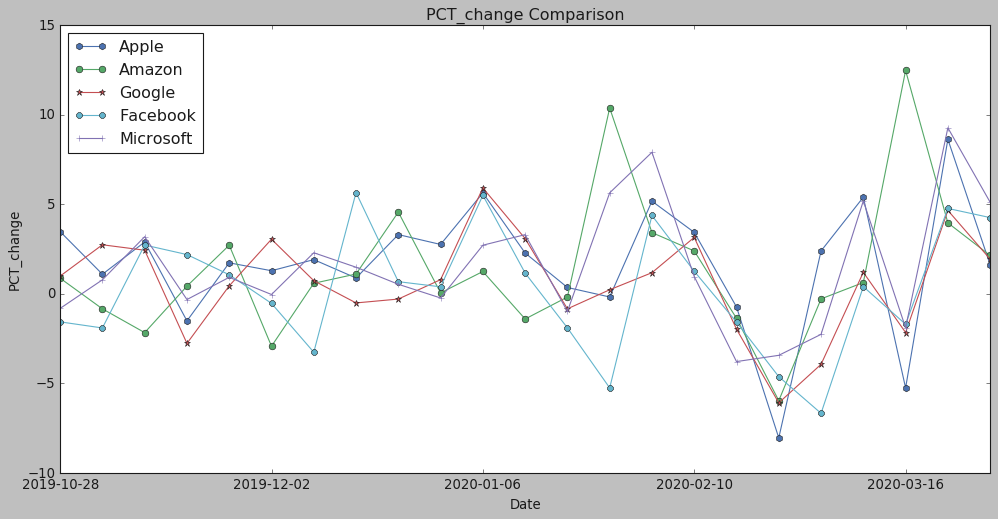

In [110]:
#file.plot(x="Date",y="Volume")
ax = plt.gca()

#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Apple_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='h',label='Apple',x_compat=True)
Amazon_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='o',label='Amazon',x_compat=True)
Google_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='*',label='Google',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='8',label='Facebook',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='+',label='Microsoft',x_compat=True)

#datacursor(formatter=formatter, hover=True)
plt.title("PCT_change Comparison")
plt.xlabel("Date")
plt.ylabel("PCT_change");

In [111]:
Apple_df = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2019, 11, 1), 
                          end=datetime.datetime(2020, 3, 30))
Amazon_df =  pdr.get_data_yahoo('Amzn', 
                          start=datetime.datetime(2019, 11, 1), 
                          end=datetime.datetime(2020, 3, 30))
Google_df =  pdr.get_data_yahoo('GOOG', 
                          start=datetime.datetime(2019, 11, 1), 
                          end=datetime.datetime(2020, 3, 30))
Microsoft_df =  pdr.get_data_yahoo('MSFT', 
                          start=datetime.datetime(2019, 11, 1), 
                          end=datetime.datetime(2020, 3, 30))
Facebook_df =  pdr.get_data_yahoo('FB', 
                          start=datetime.datetime(2019, 11, 1), 
                          end=datetime.datetime(2020, 3, 30))



In [112]:
Daily_close_Apple_df = Apple_df[['Adj Close']]

# Daily returns
Daily_pct_change_Apple_df = Daily_close_Apple_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Apple_df.fillna(0, inplace=True)

Daily_pct_change_Apple_df.head()

,Adj Close
Date,
2019-11-01,0.000000
2019-11-04,0.006567
2019-11-05,-0.001437
2019-11-06,0.000428
2019-11-07,0.011541


In [113]:
Daily_close_Amazon_df = Amazon_df[['Adj Close']]

# Daily returns
Daily_pct_change_Amazon_df = Daily_close_Amazon_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Amazon_df.fillna(0, inplace=True)

Daily_pct_change_Amazon_df.head()


,Adj Close
Date,
2019-11-01,0.000000
2019-11-04,0.007380
2019-11-05,-0.001635
2019-11-06,-0.003297
2019-11-07,-0.004215


In [114]:
Daily_close_Google_df = Google_df[['Adj Close']]

# Daily returns
Daily_pct_change_Google_df = Daily_close_Google_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Google_df.fillna(0, inplace=True)

Daily_pct_change_Google_df.head()

,Adj Close
Date,
2019-11-01,0.000000
2019-11-04,0.013841
2019-11-05,0.000511
2019-11-06,-0.000178
2019-11-07,0.013206


In [115]:
Daily_close_Microsoft_df = Microsoft_df[['Adj Close']]

# Daily returns
Daily_pct_change_Microsoft_df = Daily_close_Microsoft_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Microsoft_df.fillna(0, inplace=True)

Daily_pct_change_Microsoft_df.head()

,Adj Close
Date,
2019-11-01,0.000000
2019-11-04,0.005775
2019-11-05,-0.000623
2019-11-06,-0.002769
2019-11-07,0.001388


In [116]:
Daily_close_Facebook_df = Facebook_df[['Adj Close']]

# Daily returns
Daily_pct_change_Facebook_df = Daily_close_Facebook_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Facebook_df.fillna(0, inplace=True)

Daily_pct_change_Facebook_df.head()

,Adj Close
Date,
2019-11-01,0.000000
2019-11-04,0.005681
2019-11-05,-0.002054
2019-11-06,-0.014255
2019-11-07,-0.005899


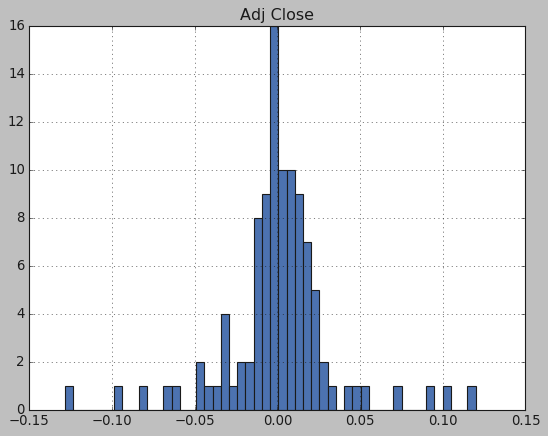

In [117]:

Daily_pct_change_Apple_df.hist(bins=50)

# Show the plot
plt.show()




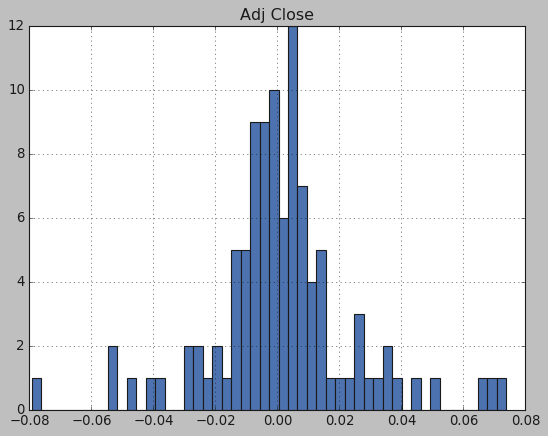

In [118]:
Daily_pct_change_Amazon_df.hist(bins=50)

# Show the plot
plt.show()

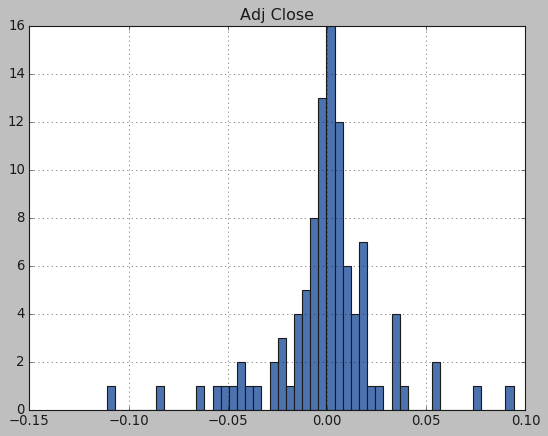

In [119]:
Daily_pct_change_Google_df.hist(bins=50)

# Show the plot
plt.show()

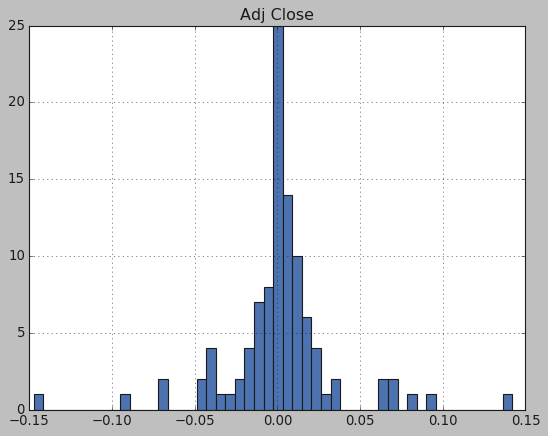

In [120]:
Daily_pct_change_Microsoft_df.hist(bins=50)

# Show the plot
plt.show()

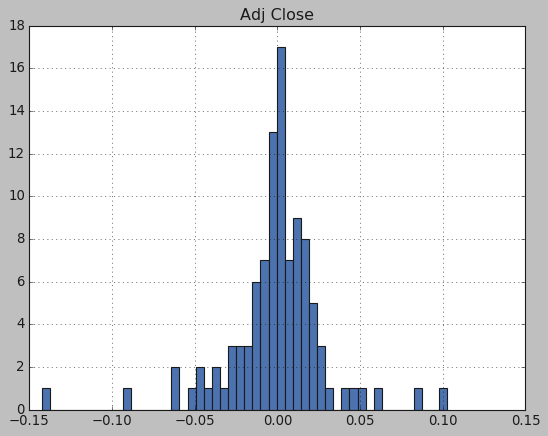

In [121]:
Daily_pct_change_Facebook_df.hist(bins=50)

# Show the plot
plt.show()

In [122]:
import seaborn as sns
sns.set()

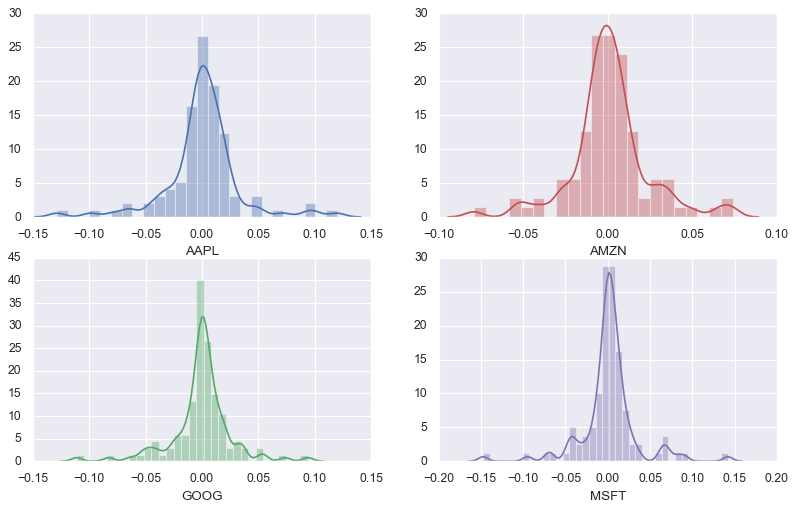

In [123]:
import seaborn as sns
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(12, 7))

# Plot a simple histogram with binsize determined automatically
sns.distplot(Daily_pct_change_Apple_df['Adj Close'], color="b", ax=axes[0, 0], axlabel='AAPL');

# Plot a kernel density estimate and rug plot
sns.distplot(Daily_pct_change_Amazon_df['Adj Close'], color="r", ax=axes[0, 1], axlabel='AMZN');

# Plot a filled kernel density estimate
sns.distplot(Daily_pct_change_Google_df['Adj Close'], color="g", ax=axes[1, 0], axlabel='GOOG');

# Plot a historgram and kernel density estimate
sns.distplot(Daily_pct_change_Microsoft_df['Adj Close'], color="m", ax=axes[1, 1], axlabel='MSFT');


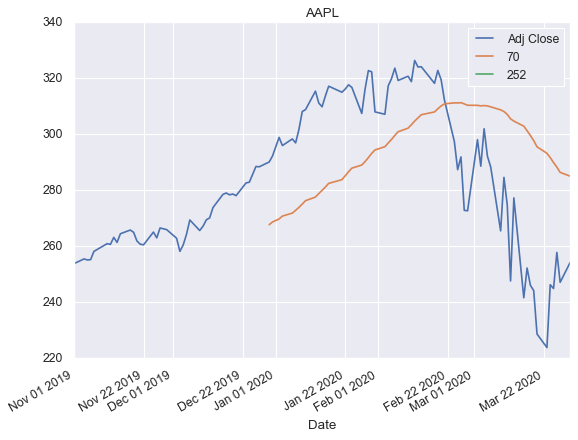

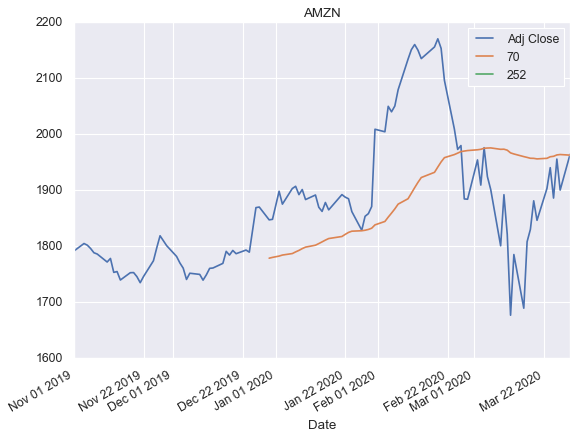

In [124]:
Apple_df_adj_close_px = Apple_df['Adj Close']
# Short moving window rolling mean
Apple_df['70'] = Apple_df_adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
Apple_df['252'] = Apple_df_adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
Apple_df[['Adj Close', '70', '252']].plot(title="AAPL")

# Show plot
plt.show()

Amazon_df_adj_close_px = Amazon_df['Adj Close']
# Short moving window rolling mean
Amazon_df['70'] = Amazon_df_adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
Amazon_df['252'] = Amazon_df_adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
Amazon_df[['Adj Close', '70', '252']].plot(title="AMZN")

# Show plot
plt.show()


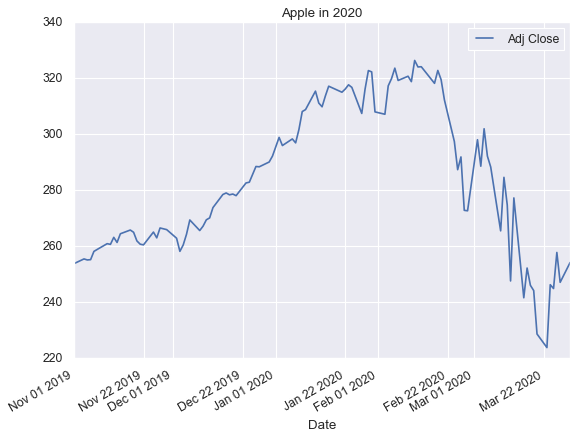

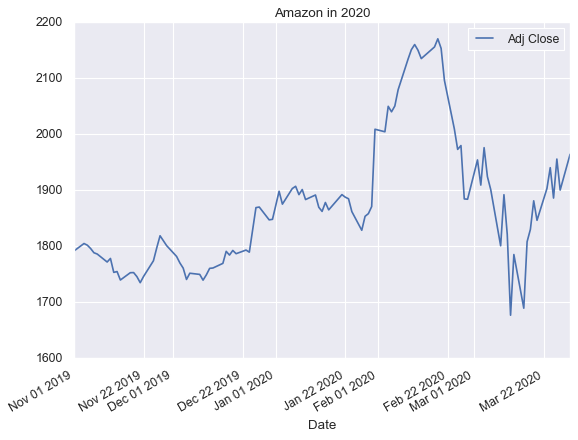

In [125]:
Apple_df.loc['2019-11-01':'2020-03-30'][['Adj Close']].plot(title="Apple in 2020");
Amazon_df.loc['2019-11-01':'2020-03-30'][['Adj Close']].plot(title="Amazon in 2020");

In [126]:
#scatter matrix plot 
from pandas.plotting import scatter_matrix
technology_comp = pd.concat([Apple_df['Open'],Amazon_df['Open'],Google_df['Open'],
                          Facebook_df['Open'],Microsoft_df['Open']],axis =1)

In [127]:

technology_comp.columns = ['Amazon_df Open', 'Apple_df Open','Google_df Open',
                       'Facebook_df Open', 'Microsoft_df Open']

In [128]:

technology_comp.head()

,Amazon_df Open,Apple_df Open,Google_df Open,Facebook_df Open,Microsoft_df Open
Date,,,,,
2019-11-01,249.539993,1788.010010,1265.000000,192.850006,144.259995
2019-11-04,257.329987,1801.010010,1276.449951,194.550003,144.830002
2019-11-05,257.049988,1809.160034,1292.890015,195.369995,144.970001
2019-11-06,256.769989,1801.000000,1289.459961,194.029999,144.369995
2019-11-07,258.739990,1803.760010,1294.280029,191.910004,143.839996


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026DCC5CB888>,
      dtype=object)

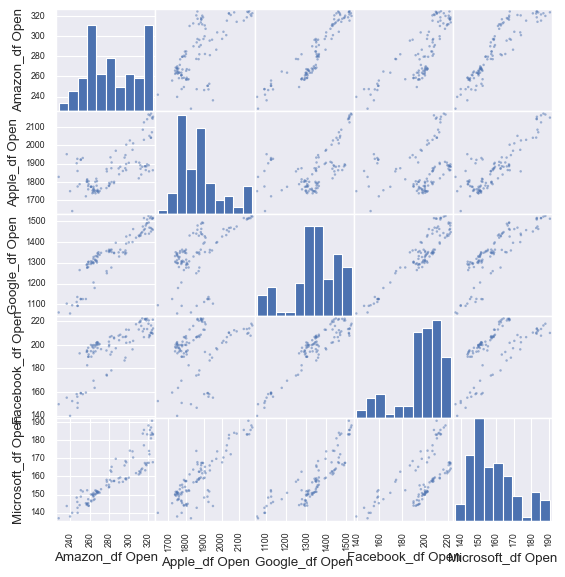

In [129]:

# to see relationship between these Technology company by opening price
scatter_matrix(technology_comp, figsize=(8,8))

In [130]:
technology_comp.columns = ['Apple_df Close',   'Amazon_df Close',  'Google_df Close',
                          'Facebook_df Cpen',   'Microsoft_df Cpen']

In [131]:
technology_comp.head()

,Apple_df Close,Amazon_df Close,Google_df Close,Facebook_df Cpen,Microsoft_df Cpen
Date,,,,,
2019-11-01,249.539993,1788.010010,1265.000000,192.850006,144.259995
2019-11-04,257.329987,1801.010010,1276.449951,194.550003,144.830002
2019-11-05,257.049988,1809.160034,1292.890015,195.369995,144.970001
2019-11-06,256.769989,1801.000000,1289.459961,194.029999,144.369995
2019-11-07,258.739990,1803.760010,1294.280029,191.910004,143.839996


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026DCFE5D9C8>,
      dtype=object)

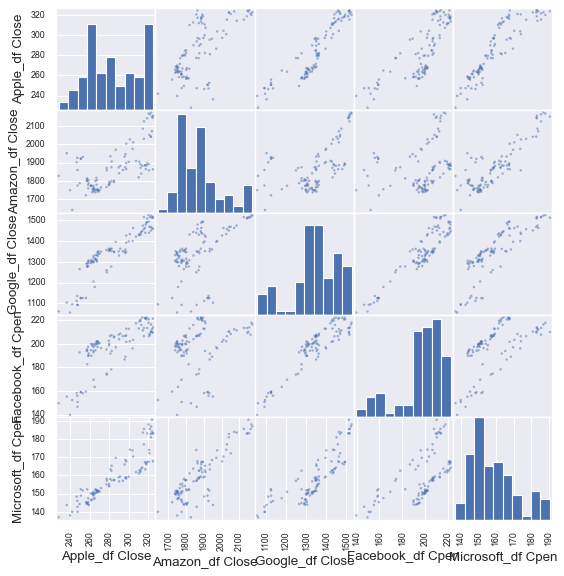

In [132]:
# to see relationship between these technology company by closing price
scatter_matrix(technology_comp, figsize=(8,8))

In [133]:
#scatter matrix plot 
from pandas.plotting import scatter_matrix
airline_comp = pd.concat([Amazon_df['Volume'],Apple_df['Volume'],Google_df['Volume'],
                          Facebook_df['Volume'],Microsoft_df['Volume']],axis =1)

In [134]:
technology_comp.columns = [' Apple_df Volume ', 'Amazon_df Volume','Google_df Volume',
                       'Facebook_df Volume', 'Microsoft_df Volume']

In [135]:
technology_comp.head()

,Apple_df Volume,Amazon_df Volume,Google_df Volume,Facebook_df Volume,Microsoft_df Volume
Date,,,,,
2019-11-01,249.539993,1788.010010,1265.000000,192.850006,144.259995
2019-11-04,257.329987,1801.010010,1276.449951,194.550003,144.830002
2019-11-05,257.049988,1809.160034,1292.890015,195.369995,144.970001
2019-11-06,256.769989,1801.000000,1289.459961,194.029999,144.369995
2019-11-07,258.739990,1803.760010,1294.280029,191.910004,143.839996


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026DD1C50148>,
      dtype=object)

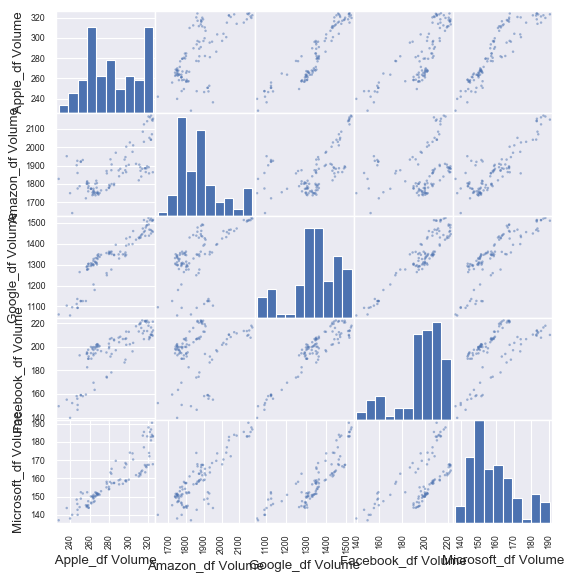

In [136]:
# to see relationship between these technology company by volume price
scatter_matrix(technology_comp, figsize=(8,8))

In [137]:
#Time series
Amazon_df = pdr.get_data_yahoo('AMZN',
                        start=datetime.datetime(2019,11,1),
                        end=datetime.datetime(2020,4,3))
Apple_df = pdr.get_data_yahoo('AAPL',
                        start=datetime.datetime(2019,11,1),
                        end=datetime.datetime(2020,4,3))

Google_df = pdr.get_data_yahoo('GOOG',
                        start=datetime.datetime(2019,11,1),
                        end=datetime.datetime(2020,4,3))
Facebook_df = pdr.get_data_yahoo('FB',
                        start=datetime.datetime(2019,11,1),
                        end=datetime.datetime(2020,4,3))
Microsoft_df = pdr.get_data_yahoo('MSFT',
                        start=datetime.datetime(2019,11,1),
                        end=datetime.datetime(2020,4,3))

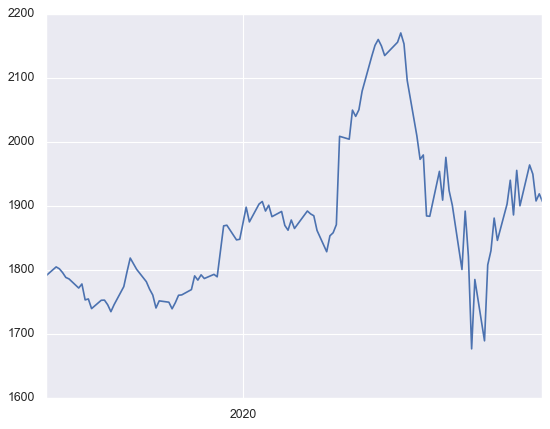

In [138]:
#AmazonTime series
plt.plot(Amazon_df.index, Amazon_df['Adj Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.show()


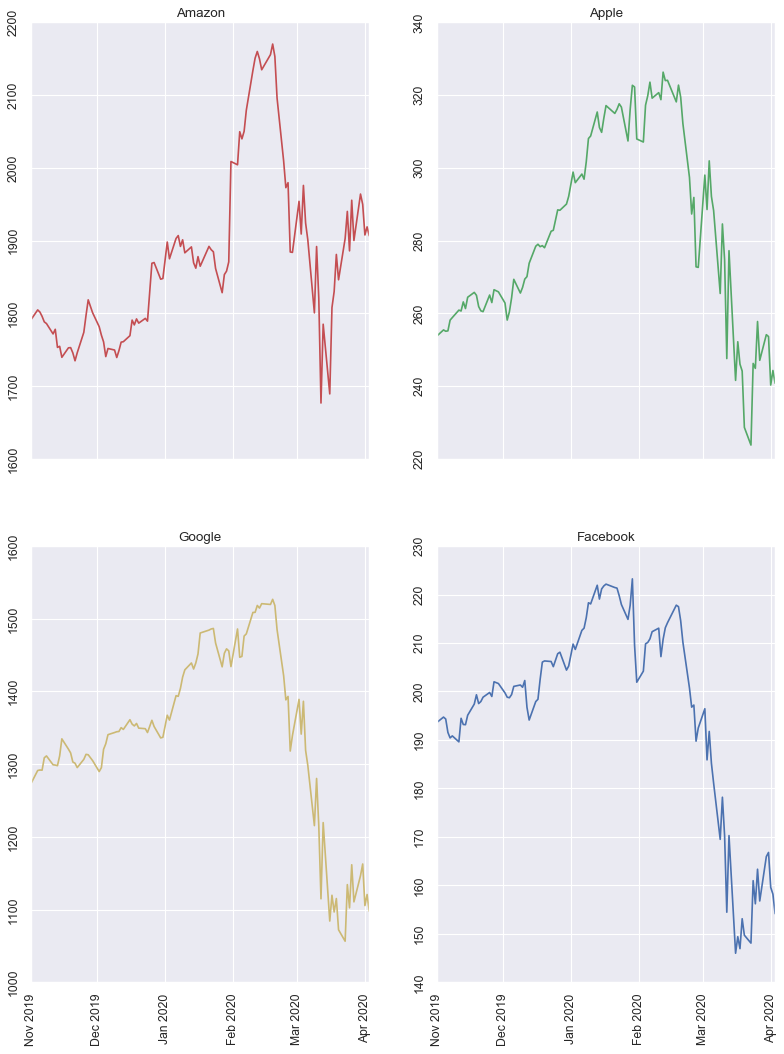

In [139]:

f, ax = plt.subplots(2, 2, figsize=(12,15), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())

ax[0,0].plot(Amazon_df.index, Amazon_df['Adj Close'], color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('Amazon');

ax[0,1].plot(Apple_df.index, Apple_df['Adj Close'], color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Apple');

ax[1,0].plot(Google_df.index, Google_df['Adj Close'], color='y')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('Google');

ax[1,1].plot(Facebook_df.index, Facebook_df['Adj Close'], color='b')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('Facebook');